In [22]:
import pandas as pd
import numpy as np
from PIL import Image

from sklearn.model_selection import train_test_split

from os import listdir, replace
from os.path import isfile, join
from matplotlib import pyplot as plt

In [37]:
bart = [f for f in listdir("Treino2") if isfile(join("Treino2", f)) and "bart" in f]
homer = [f for f in listdir("Treino2") if isfile(join("Treino2", f)) and "homer" in f]

In [38]:
bartImages = [Image.open(f"Treino2/{x}") for x in bart]
homerImages = [Image.open(f"Treino2/{x}") for x in homer]

In [89]:
bartImages[0]

(260, 480)

In [4]:
def calculateMeanShape(bartImages, homerImages):
    meanShape = np.array([0,0])
    bartSize = len(bartImages)
    homerSize =len(homerImages)
    for i in range(max(bartSize, homerSize)):
        if i < bartSize:
            meanShape += bartImages[i].size
        if i < homerSize:
            meanShape += homerImages[i].size
    return meanShape / (bartSize + homerSize)

In [14]:
def applyImageAugmentation(bartImages, homerImages):
    meanShape = calculateMeanShape(bartImages, homerImages)
    bartSize = len(bartImages)
    homerSize =len(homerImages)
    for i in range(max(bartSize, homerSize)):
        if i < bartSize:
            bartImages[i] = bartImages[i].resize((64, 64), resample=Image.Resampling.BILINEAR).resize((256, 256), Image.Resampling.NEAREST)
        if i < homerSize:
            #homerImages[i] = homerImages[i].resize((64, 64), resample=Image.Resampling.BILINEAR).resize((int(meanShape[0]), int(meanShape[1])), Image.Resampling.NEAREST)
            homerImages[i] = homerImages[i].resize((256, 256), Image.Resampling.NEAREST)
    return bartImages, homerImages

In [6]:
def aggregateImages(img1, img2):
    totalWidth = img1.size[0] + img2.size[0]
    maxHeight = max(img1.size[1], img2.size[1])
    new_im = Image.new('RGB', (totalWidth, maxHeight))
    new_im.paste(img1, (0,0))
    new_im.paste(img2, (img2.size[0],0))
    return new_im

In [7]:
def generateDataSet(bartImages, homerImages):
    result = []
    bartImages, homerImages = applyImageAugmentation(bartImages, homerImages)
    for b in bartImages:
        for h in homerImages:
            result.append(aggregateImages(b, h))
    return result

In [23]:
applyImageAugmentation(bartImages, homerImages)
homerImages[0].size

(287, 410)

In [39]:
counter = 0
for i in generateDataSet(bartImages, homerImages):
    i.save(f"train/image{counter}.jpg")
    counter += 1

In [40]:
allImages = [f for f in listdir("train") if isfile(join("train", f))]

RANDOM_STATE = 1337

train, test = train_test_split(allImages, test_size=0.3, random_state=RANDOM_STATE)

In [41]:
for i in test:
    replace(f"train/{i}", f"test/{i}")

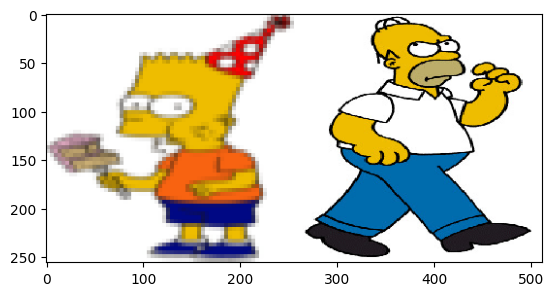

In [36]:
test = aggregateImages(bartImages[0], homerImages[1])

plt.imshow(test)